# CODE PREP

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREP

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/13fElm9JeRJ8-6FCPVqGl2cS27zPpDh_e0qnHif308S8/edit#gid=1183985856'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
raw = pd.read_csv(sheet_url_trf)
raw

,Rank,Country,Regional,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual
0,1,Switzerland,Western Europe,2015,7.5870,1.3965,1.3495,0.9414,0.6656,0.2968,0.4198,2.5174
1,2,Iceland,Western Europe,2015,7.5610,1.3023,1.4022,0.9478,0.6288,0.4363,0.1415,2.7020
2,3,Denmark,Western Europe,2015,7.5270,1.3255,1.3606,0.8746,0.6494,0.3414,0.4836,2.4920
3,4,Norway,Western Europe,2015,7.5220,1.4590,1.3310,0.8852,0.6697,0.3470,0.3650,2.4653
4,5,Canada,North America,2015,7.4270,1.3263,1.3226,0.9056,0.6330,0.4581,0.3296,2.4518
...,...,...,...,...,...,...,...,...,...,...,...,...
1099,134,Botswana,Sub-Saharan Africa,2022,3.4711,1.5026,0.8155,0.2798,0.5714,0.0125,0.1020,0.1874
1100,135,Rwanda,Sub-Saharan Africa,2022,3.2682,0.7853,0.1327,0.4615,0.6215,0.1867,0.5442,0.5363
1101,136,Zimbabwe,Sub-Saharan Africa,2022,2.9951,0.9466,0.6905,0.2701,0.3292,0.1063,0.1049,0.5475
1102,137,Lebanon,Middle East and Northern Africa,2022,2.9553,1.3921,0.4980,0.6310,0.1028,0.0822,0.0338,0.2155


In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          1104 non-null   int64  
 1   Country                       1104 non-null   object 
 2   Regional                      1104 non-null   object 
 3   Year                          1104 non-null   int64  
 4   Happiness Score               1104 non-null   float64
 5   GDP per capita                1104 non-null   float64
 6   Social support                1104 non-null   float64
 7   Healthy life expectancy       1104 non-null   float64
 8   Freedom to make life choices  1104 non-null   float64
 9   Generosity                    1104 non-null   float64
 10  Perceptions of corruption     1104 non-null   float64
 11  Dystopia residual             1104 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 103.6+ KB


# EDA

## DESCRIPTIVE

In [ ]:
df = raw.copy()
df['Year'] = df['Year'].astype('string')
df.columns

Index(['Rank', 'Country', 'Regional', 'Year', 'Happiness Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia residual'],
      dtype='object')

In [ ]:
numerical = ['Happiness Score','GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia residual']

In [ ]:
categorical = ['Country', 'Regional', 'Year']

In [ ]:
df[categorical].describe()

,Country,Regional,Year
count,1104,1104,1104
unique,138,10,8
top,Switzerland,Central and Eastern Europe,2015
freq,8,232,138


*  There are 138 countries analyzed
*  The time scope is 8 years starting from 2015 to 2022
*  The 138 countries are grouped into 10 Regions

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
desc = df[numerical].describe()
desc.loc['kurtosis'] = df[numerical].kurt()
desc.loc['skewness'] = df[numerical].skew()
desc.loc['variance'] = df[numerical].var()
desc.round(2)

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual
count,1104.000,1104.000,1104.000,1104.000,1104.000,1104.000,1104.000,1104.000
mean,5.530,1.020,1.060,0.640,0.450,0.200,0.130,2.040
std,1.080,0.410,0.320,0.230,0.150,0.110,0.110,0.570
min,2.400,0.000,0.000,0.000,0.000,0.000,0.000,0.180
25%,4.720,0.740,0.870,0.510,0.360,0.120,0.050,1.700
50%,5.540,1.040,1.090,0.660,0.460,0.180,0.090,2.060
75%,6.320,1.320,1.290,0.800,0.560,0.260,0.160,2.420
max,7.840,2.210,1.640,1.140,0.740,0.840,0.590,3.600
kurtosis,-0.610,-0.400,0.040,-0.180,-0.260,2.700,1.960,0.390
skewness,-0.070,-0.140,-0.580,-0.510,-0.480,1.170,1.540,-0.310



*  Average World Happiness Score from 2015-2022 is 5.5 with min 2.4 and max 7.84
*  Average World GDP from 2015-2022 is 1.02
*  Average World Social Support from 2015-2022 is 1.06
*  Average World Health (Life Expectancy) from 2015-2022 is 0.64
*  Average World Freedom from 2015-2022 is 0.45
*  Average World Generosity from 2015-2022 is 0.2
*  Average World Perceptions of Corruption from 2015-2022 is 0.13

## TOP AND LOWEST HAPPINESS SCORE

### EVERY YEAR

In [ ]:
df1 = raw.copy()

#### TOP 5 RANK

In [ ]:
df1 = df1.groupby('Year').head()
df1.head()

,Rank,Country,Regional,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual
0,1,Switzerland,Western Europe,2015,7.587,1.397,1.349,0.941,0.666,0.297,0.420,2.517
1,2,Iceland,Western Europe,2015,7.561,1.302,1.402,0.948,0.629,0.436,0.141,2.702
2,3,Denmark,Western Europe,2015,7.527,1.325,1.361,0.875,0.649,0.341,0.484,2.492
3,4,Norway,Western Europe,2015,7.522,1.459,1.331,0.885,0.670,0.347,0.365,2.465
4,5,Canada,North America,2015,7.427,1.326,1.323,0.906,0.633,0.458,0.330,2.452


In [ ]:
df1rank = df1[['Rank','Country']]
df1rank = pd.get_dummies(df1rank, columns = ['Rank'])
df1rank = df1rank.replace(0, np.nan)

In [ ]:
df1rank = df1rank.groupby('Country').count()
df1rank

,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5
Country,,,,,
Canada,0,0,0,0,1
Denmark,1,5,2,0,0
Finland,5,0,0,0,2
Iceland,0,1,3,4,0
Netherlands,0,0,0,0,3
Norway,1,1,1,2,1
Switzerland,1,1,2,2,1


*  Finland 5 kali Rank 1
*  Denmark 5 kali Rank 2, 1 kali Rank 1

#### LOWEST 5 RANK

In [ ]:
df2 = raw.copy()
df2 = df2.groupby('Year').tail()
df2.head()

,Rank,Country,Regional,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual
133,134,Burkina Faso,Sub-Saharan Africa,2015,3.587,0.258,0.852,0.271,0.395,0.217,0.128,1.465
134,135,Afghanistan,Southern Asia,2015,3.575,0.320,0.303,0.303,0.234,0.365,0.097,1.952
135,136,Rwanda,Sub-Saharan Africa,2015,3.465,0.222,0.774,0.429,0.592,0.226,0.552,0.670
136,137,Benin,Sub-Saharan Africa,2015,3.340,0.287,0.354,0.319,0.484,0.183,0.080,1.633
137,138,Togo,Sub-Saharan Africa,2015,2.839,0.209,0.140,0.284,0.364,0.167,0.107,1.567


In [ ]:
df2rank = df2[['Rank','Country']]
df2rank = pd.get_dummies(df2rank, columns = ['Rank'])
df2rank = df2rank.replace(0, np.nan)

In [ ]:
df2rank = df2rank.groupby('Country').count()
df2rank

,Rank_134,Rank_135,Rank_136,Rank_137,Rank_138
Country,,,,,
Afghanistan,0,1,0,1,4
Benin,0,0,1,1,0
Botswana,2,1,0,0,0
Burkina Faso,1,0,0,0,0
Guinea,1,1,0,0,0
Lebanon,0,0,0,1,0
Liberia,1,1,0,0,0
Malawi,3,0,0,0,0
Rwanda,0,2,5,1,0


*  Afghanistan 4 kali rank terakhir (rank 138)
*  Togo 2 kali rank terakhir tapi memiliki average yearly happiness growth rate tertinggi

### TOTAL ALL YEAR

#### TOP 10

In [ ]:
df3 = raw.copy()
df3 = df3.groupby('Country')['Happiness Score'].sum().reset_index().sort_values('Happiness Score', ascending = False).head(10)
df3

,Country,Happiness Score
37,Finland,61.161
30,Denmark,60.632
117,Switzerland,60.200
49,Iceland,60.171
93,Norway,59.950
87,Netherlands,59.351
116,Sweden,58.697
88,New Zealand,58.341
21,Canada,58.114
5,Australia,57.950


##### BAR CHART

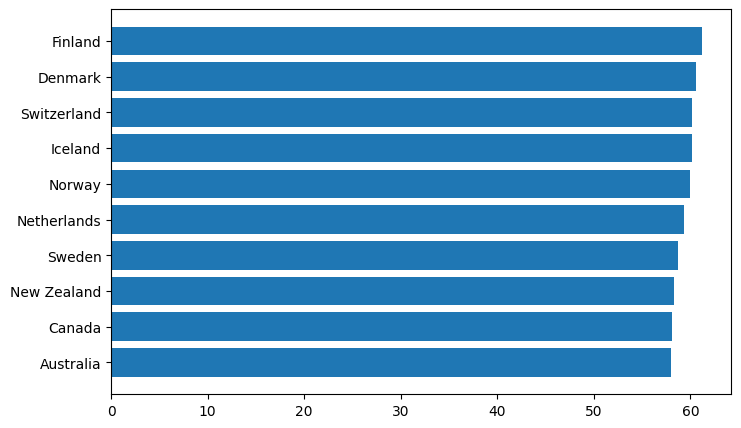

In [ ]:
df3= df3.sort_values('Happiness Score')
plt.figure(figsize =(8,5))
plt.barh(df3['Country'], df3['Happiness Score'])
plt.show()

In [ ]:
df3_yearly = raw.copy()
df3_yearly = df3_yearly.groupby(['Year','Country'])['Happiness Score'].sum().reset_index()
df3_yearly.head(10)

,Year,Country,Happiness Score
0,2015,Afghanistan,3.575
1,2015,Albania,4.959
2,2015,Algeria,5.605
3,2015,Argentina,6.574
4,2015,Armenia,4.350
5,2015,Australia,7.284
6,2015,Austria,7.200
7,2015,Azerbaijan,5.212
8,2015,Bahrain,5.960
9,2015,Bangladesh,4.694


In [ ]:
df3_yearly_pivot = df3_yearly.pivot(index=['Country'], columns='Year',values=['Happiness Score'])

In [ ]:
df3_yearly_pivot.columns = df3_yearly_pivot.columns.droplevel()

In [ ]:
df3_yearly_pivot = df3_yearly_pivot.rename_axis(None,axis=1)
df3_yearly_pivot

,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,
Afghanistan,3.575,3.360,3.794,3.631,3.203,2.567,2.523,2.404
Albania,4.959,4.655,4.644,4.586,4.719,4.883,5.117,5.199
Algeria,5.605,6.355,5.872,5.295,5.211,5.005,4.887,5.122
Argentina,6.574,6.650,6.599,6.388,6.086,5.975,5.929,5.967
Armenia,4.350,4.360,4.376,4.321,4.559,4.677,5.283,5.399
...,...,...,...,...,...,...,...,...
Venezuela,6.810,6.084,5.250,4.806,4.707,5.053,4.892,4.926
Vietnam,5.360,5.061,5.074,5.103,5.175,5.354,5.411,5.485
Yemen,4.077,3.724,3.593,3.355,3.380,3.527,3.658,4.197


In [ ]:
df3_yearly_sorted = df3.merge(df3_yearly_pivot, how = 'left', left_on = 'Country', right_on = 'Country')
df3_yearly_sorted = df3_yearly_sorted.sort_values('Happiness Score')
df3_yearly_sorted = df3_yearly_sorted.drop(['Happiness Score'], axis = 1)
df3_yearly_sorted.tail()

,Country,2015,2016,2017,2018,2019,2020,2021,2022
5,Norway,7.522,7.498,7.537,7.594,7.554,7.488,7.393,7.365
6,Iceland,7.561,7.501,7.504,7.495,7.494,7.505,7.554,7.558
7,Switzerland,7.587,7.509,7.494,7.487,7.480,7.560,7.572,7.512
8,Denmark,7.527,7.526,7.522,7.555,7.600,7.646,7.620,7.636
9,Finland,7.406,7.413,7.469,7.632,7.769,7.809,7.842,7.821


In [ ]:
# plt.figure(figsize =(25,5))
# df3_yearly_sorted.plot(x='Country', kind='barh', stacked=True)
# plt.legend(loc= 2)
# plt.show()

In [ ]:
df3_yearly_sorted.columns

Index(['Country', 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='object')

##### STACKED BAR CHART

In [ ]:
x = df3_yearly_sorted['Country']
y1 =  df3_yearly_sorted[2015]
y2 = df3_yearly_sorted[2016]
y3 = df3_yearly_sorted[2017]
y4 = df3_yearly_sorted[2018]
y5 = df3_yearly_sorted[2019]
y6 = df3_yearly_sorted[2020]
y7 = df3_yearly_sorted[2021]
y8 = df3_yearly_sorted[2022]

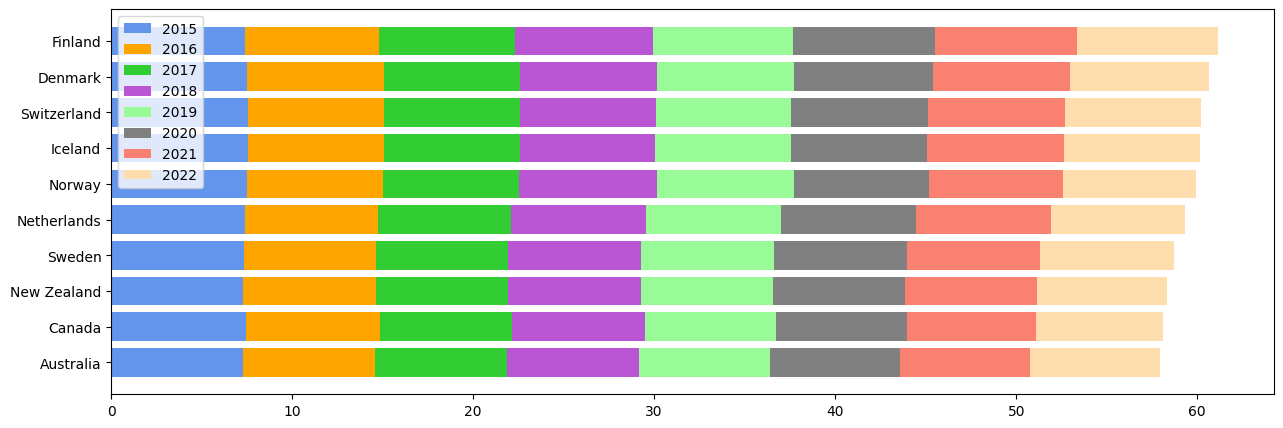

In [ ]:
plt.figure(figsize =(15,5))

plt.barh(x, y1, color='cornflowerblue')
plt.barh(x, y2, left=y1, color='orange')
plt.barh(x, y3, left=y1+y2, color='limegreen')
plt.barh(x, y4, left=y1+y2+y3, color='mediumorchid')
plt.barh(x, y5, left=y1+y2+y3+y4, color='palegreen')
plt.barh(x, y6, left=y1+y2+y3+y4+y5, color='gray')
plt.barh(x, y7, left=y1+y2+y3+y4+y5+y6, color='salmon')
plt.barh(x, y8, left=y1+y2+y3+y4+y5+y6+y7, color='navajowhite')

plt.legend(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], loc = 2)
plt.show()

In [ ]:
raw.head()

,Rank,Country,Regional,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual
0,1,Switzerland,Western Europe,2015,7.587,1.397,1.349,0.941,0.666,0.297,0.420,2.517
1,2,Iceland,Western Europe,2015,7.561,1.302,1.402,0.948,0.629,0.436,0.141,2.702
2,3,Denmark,Western Europe,2015,7.527,1.325,1.361,0.875,0.649,0.341,0.484,2.492
3,4,Norway,Western Europe,2015,7.522,1.459,1.331,0.885,0.670,0.347,0.365,2.465
4,5,Canada,North America,2015,7.427,1.326,1.323,0.906,0.633,0.458,0.330,2.452


#### LOWEST 10

In [ ]:
df4 = raw.copy()
df4 = df4.groupby('Country')['Happiness Score'].sum().reset_index().sort_values('Happiness Score').head(10)
df4

,Country,Happiness Score
0,Afghanistan,25.057
104,Rwanda,27.188
120,Tanzania,28.132
137,Zimbabwe,29.473
135,Yemen,29.511
15,Botswana,29.567
122,Togo,30.127
74,Malawi,30.303
73,Madagascar,31.440
50,India,32.658


##### BAR CHART

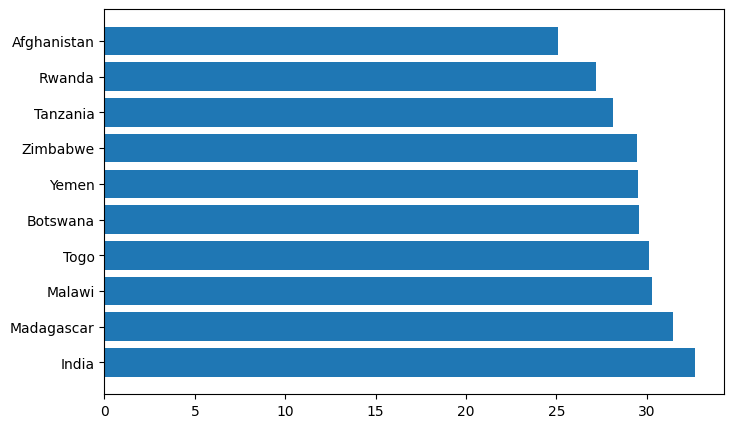

In [ ]:
df4= df4.sort_values('Happiness Score',ascending = False)
plt.figure(figsize =(8,5))
plt.barh(df4['Country'], df4['Happiness Score'])
plt.show()

In [ ]:
df4_yearly = raw.copy()
df4_yearly = df4_yearly.groupby(['Year','Country'])['Happiness Score'].sum().reset_index()
df4_yearly.head(10)

,Year,Country,Happiness Score
0,2015,Afghanistan,3.575
1,2015,Albania,4.959
2,2015,Algeria,5.605
3,2015,Argentina,6.574
4,2015,Armenia,4.350
5,2015,Australia,7.284
6,2015,Austria,7.200
7,2015,Azerbaijan,5.212
8,2015,Bahrain,5.960
9,2015,Bangladesh,4.694


In [ ]:
df4_yearly_pivot = df4_yearly.pivot(index=['Country'], columns='Year',values=['Happiness Score'])

In [ ]:
df4_yearly_pivot.columns = df4_yearly_pivot.columns.droplevel()

In [ ]:
df4_yearly_pivot = df4_yearly_pivot.rename_axis(None,axis=1)
df4_yearly_pivot

,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,
Afghanistan,3.575,3.360,3.794,3.631,3.203,2.567,2.523,2.404
Albania,4.959,4.655,4.644,4.586,4.719,4.883,5.117,5.199
Algeria,5.605,6.355,5.872,5.295,5.211,5.005,4.887,5.122
Argentina,6.574,6.650,6.599,6.388,6.086,5.975,5.929,5.967
Armenia,4.350,4.360,4.376,4.321,4.559,4.677,5.283,5.399
...,...,...,...,...,...,...,...,...
Venezuela,6.810,6.084,5.250,4.806,4.707,5.053,4.892,4.926
Vietnam,5.360,5.061,5.074,5.103,5.175,5.354,5.411,5.485
Yemen,4.077,3.724,3.593,3.355,3.380,3.527,3.658,4.197


In [ ]:
df4_yearly_sorted = df4.merge(df4_yearly_pivot, how = 'left', left_on = 'Country', right_on = 'Country')
df4_yearly_sorted = df4_yearly_sorted.sort_values('Happiness Score', ascending = False)
df4_yearly_sorted = df4_yearly_sorted.drop(['Happiness Score'], axis = 1)
df4_yearly_sorted.head()

,Country,2015,2016,2017,2018,2019,2020,2021,2022
0,India,4.565,4.404,4.315,4.190,4.015,3.573,3.819,3.777
1,Madagascar,3.681,3.695,3.644,3.774,3.933,4.166,4.208,4.339
2,Malawi,4.292,4.156,3.970,3.587,3.410,3.538,3.600,3.750
3,Togo,2.839,3.303,3.495,3.998,4.085,4.187,4.107,4.112
4,Botswana,4.332,3.974,3.766,3.590,3.488,3.479,3.466,3.471


##### STACKED BAR CHART

In [ ]:
newx = df4_yearly_sorted['Country']
newy1 = df4_yearly_sorted[2015]
newy2 = df4_yearly_sorted[2016]
newy3 = df4_yearly_sorted[2017]
newy4 = df4_yearly_sorted[2018]
newy5 = df4_yearly_sorted[2019]
newy6 = df4_yearly_sorted[2020]
newy7 = df4_yearly_sorted[2021]
newy8 = df4_yearly_sorted[2022]

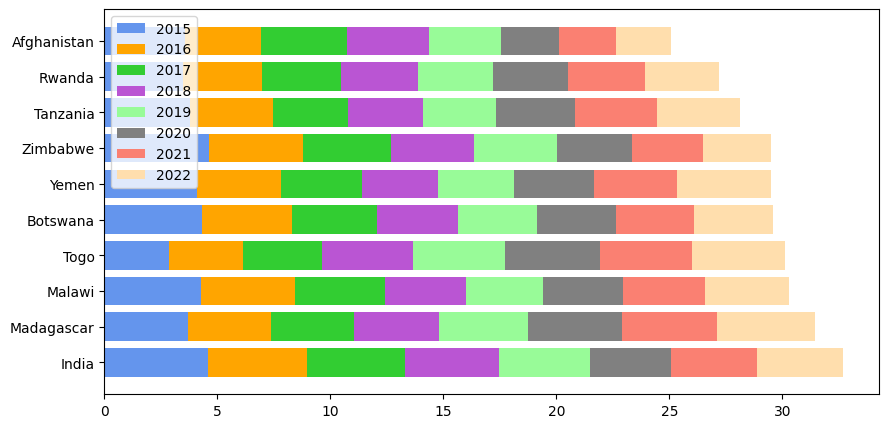

In [ ]:
plt.figure(figsize =(10,5))

plt.barh(newx, newy1, color='cornflowerblue')
plt.barh(newx, newy2, left=newy1, color='orange')
plt.barh(newx, newy3, left=newy1+newy2, color='limegreen')
plt.barh(newx, newy4, left=newy1+newy2+newy3, color='mediumorchid')
plt.barh(newx, newy5, left=newy1+newy2+newy3+newy4, color='palegreen')
plt.barh(newx, newy6, left=newy1+newy2+newy3+newy4+newy5, color='gray')
plt.barh(newx, newy7, left=newy1+newy2+newy3+newy4+newy5+newy6, color='salmon')
plt.barh(newx, newy8, left=newy1+newy2+newy3+newy4+newy5+newy6+newy7, color='navajowhite')

plt.legend(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], loc = 2)
plt.show()

### AVG TOTAL

#### TOP 10

In [ ]:
df5 = raw.copy()
df5 = df5.groupby('Country')['Happiness Score'].mean().reset_index().sort_values('Happiness Score', ascending = False).head(10)
df5

,Country,Happiness Score
37,Finland,7.645
30,Denmark,7.579
117,Switzerland,7.525
49,Iceland,7.521
93,Norway,7.494
87,Netherlands,7.419
116,Sweden,7.337
88,New Zealand,7.293
21,Canada,7.264
5,Australia,7.244


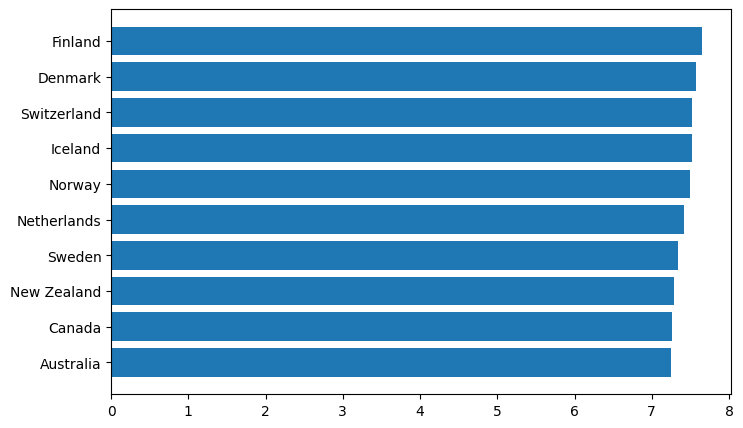

In [ ]:
df5= df5.sort_values('Happiness Score')
plt.figure(figsize =(8,5))
plt.barh(df5['Country'], df5['Happiness Score'])
plt.show()

#### LOWEST 10

In [ ]:
df6 = raw.copy()
df6 = df6.groupby('Country')['Happiness Score'].mean().reset_index().sort_values('Happiness Score').head(10)
df6

,Country,Happiness Score
0,Afghanistan,3.132
104,Rwanda,3.399
120,Tanzania,3.517
137,Zimbabwe,3.684
135,Yemen,3.689
15,Botswana,3.696
122,Togo,3.766
74,Malawi,3.788
73,Madagascar,3.930
50,India,4.082


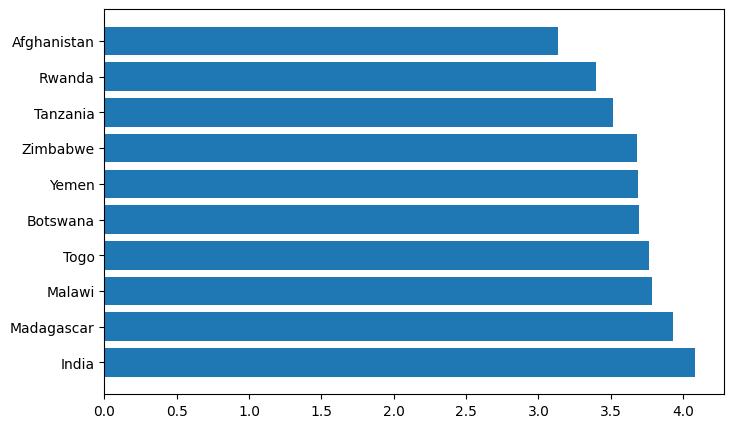

In [ ]:
df6= df6.sort_values('Happiness Score',ascending = False)
plt.figure(figsize =(8,5))
plt.barh(df6['Country'], df6['Happiness Score'])
plt.show()

## GROWTH

In [ ]:
df0 = raw.copy()
df0 = df0.sort_values(['Country','Year'])
df0['lag_Happiness'] = df0.groupby('Country')['Happiness Score'].shift(1)
df0.head(10)

,Rank,Country,Regional,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual,lag_Happiness
134,135,Afghanistan,Southern Asia,2015,3.575,0.320,0.303,0.303,0.234,0.365,0.097,1.952,NaN
274,137,Afghanistan,Southern Asia,2016,3.360,0.382,0.110,0.173,0.164,0.313,0.071,2.146,3.575
404,129,Afghanistan,Southern Asia,2017,3.794,0.402,0.582,0.181,0.106,0.312,0.061,2.151,3.360
545,132,Afghanistan,Southern Asia,2018,3.631,0.332,0.537,0.255,0.085,0.191,0.036,2.196,3.794
689,138,Afghanistan,Southern Asia,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.793,3.631
827,138,Afghanistan,Southern Asia,2020,2.567,0.301,0.356,0.266,0.000,0.135,0.001,1.507,3.203
965,138,Afghanistan,Southern Asia,2021,2.523,0.370,0.000,0.126,0.000,0.122,0.010,1.895,2.567
1103,138,Afghanistan,Southern Asia,2022,2.404,0.758,0.000,0.289,0.000,0.089,0.005,1.263,2.523
87,88,Albania,Central and Eastern Europe,2015,4.959,0.879,0.804,0.813,0.357,0.143,0.064,1.899,NaN
237,100,Albania,Central and Eastern Europe,2016,4.655,0.955,0.502,0.730,0.319,0.168,0.053,1.928,4.959


In [ ]:
df0['growth_percentage']= ((df0['Happiness Score']/df0['lag_Happiness'])-1)*100
df0.head(10)

,Rank,Country,Regional,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual,lag_Happiness,growth_percentage
134,135,Afghanistan,Southern Asia,2015,3.575,0.320,0.303,0.303,0.234,0.365,0.097,1.952,NaN,NaN
274,137,Afghanistan,Southern Asia,2016,3.360,0.382,0.110,0.173,0.164,0.313,0.071,2.146,3.575,-6.014
404,129,Afghanistan,Southern Asia,2017,3.794,0.402,0.582,0.181,0.106,0.312,0.061,2.151,3.360,12.917
545,132,Afghanistan,Southern Asia,2018,3.631,0.332,0.537,0.255,0.085,0.191,0.036,2.196,3.794,-4.283
689,138,Afghanistan,Southern Asia,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.793,3.631,-11.791
827,138,Afghanistan,Southern Asia,2020,2.567,0.301,0.356,0.266,0.000,0.135,0.001,1.507,3.203,-19.867
965,138,Afghanistan,Southern Asia,2021,2.523,0.370,0.000,0.126,0.000,0.122,0.010,1.895,2.567,-1.714
1103,138,Afghanistan,Southern Asia,2022,2.404,0.758,0.000,0.289,0.000,0.089,0.005,1.263,2.523,-4.721
87,88,Albania,Central and Eastern Europe,2015,4.959,0.879,0.804,0.813,0.357,0.143,0.064,1.899,NaN,NaN
237,100,Albania,Central and Eastern Europe,2016,4.655,0.955,0.502,0.730,0.319,0.168,0.053,1.928,4.959,-6.130


### AVERAGE REGION GROWTH

In [ ]:
avgregion = df0.copy()
avgregion = avgregion.groupby(['Regional'])['growth_percentage'].mean().reset_index().sort_values('growth_percentage', ascending = False)
avgregion

,Regional,growth_percentage
1,Central and Eastern Europe,1.443
8,Sub-Saharan Africa,1.106
2,Eastern Asia,0.670
9,Western Europe,0.498
6,Southeastern Asia,0.443
0,Australia and New Zealand,-0.205
3,Latin America and Caribbean,-0.532
5,North America,-0.537
4,Middle East and Northern Africa,-0.601
7,Southern Asia,-0.852


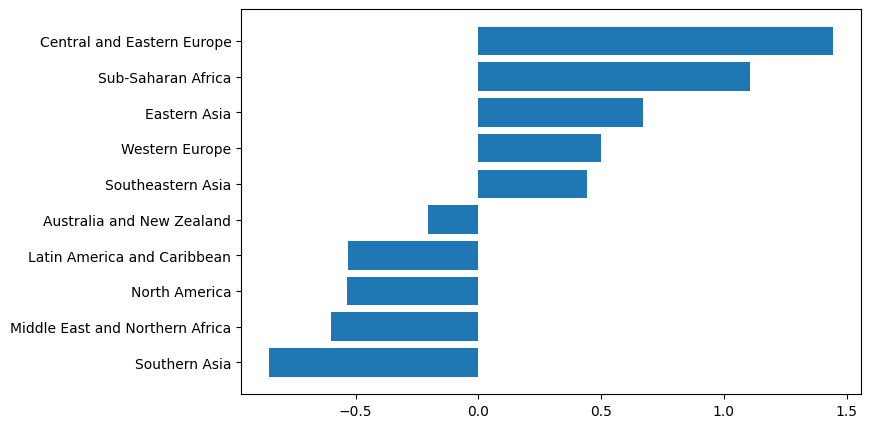

In [ ]:
avgregion = avgregion.sort_values('growth_percentage')
plt.figure(figsize =(8,5))
plt.barh(avgregion['Regional'], avgregion['growth_percentage'])
plt.show()

*  Central and Eastern Europe adalah region dengan average growth tertinggi
*  Southern Asia adalah region dengan average growth terendah

#### MOVE REGION TO COLUMN

In [ ]:
avgyear = df0.copy()
avgyear = avgyear.groupby(['Year'])['growth_percentage'].mean().reset_index().sort_values('Year')
avgyear.head(10)

,Year,growth_percentage
0,2015,NaN
1,2016,0.101
2,2017,0.460
3,2018,0.709
4,2019,0.755
5,2020,0.926
6,2021,0.541
7,2022,-0.250


In [ ]:
avgyear2 = df0.copy()
avgyear2 = avgyear2.groupby(['Year','Regional'])['growth_percentage'].mean().reset_index()
avgyear2.tail(10)

,Year,Regional,growth_percentage
70,2022,Australia and New Zealand,-0.677
71,2022,Central and Eastern Europe,1.740
72,2022,Eastern Asia,1.205
73,2022,Latin America and Caribbean,-1.209
74,2022,Middle East and Northern Africa,-1.042
75,2022,North America,-0.368
76,2022,Southeastern Asia,0.162
77,2022,Southern Asia,-1.464
78,2022,Sub-Saharan Africa,-1.314
79,2022,Western Europe,-0.242


In [ ]:
avgyear2_pivot = avgyear2.pivot(index=['Year'], columns='Regional',values=['growth_percentage'])
avgyear2_pivot

growth_percentage                                          \
Regional Australia and New Zealand Central and Eastern Europe Eastern Asia   
Year                                                                         
2015                           NaN                        NaN          NaN   
2016                         0.528                      0.730        0.020   
2017                        -0.335                      0.788        0.413   
2018                        -0.015                      1.119        0.497   
2019                        -0.414                      1.797        0.338   
2020                        -0.090                      1.936        0.486   
2021                        -0.430                      1.994        1.728   
2022                        -0.677                      1.740        1.205   

                                                                      \
Regional Latin America and Caribbean Middle East and Northern Africa   
Year                                                                   
2015                             NaN                             NaN   
2016                          -0.882                           1.419   
2017                          -1.271                          -0.643   
2018                          -0.004                          -1.758   
2019                           0.116                          -1.305   
2020                           0.527                          -0.785   
2021                          -1.002                          -0.091   
2022                          -1.209                          -1.042   

                                                                           \
Regional North America Southeastern Asia Southern Asia Sub-Saharan Africa   
Year                                                                        
2015               NaN               NaN           NaN                NaN   
2016            -0.260             0.594        -0.378             -0.653   
2017            -1.376             1.287         2.817              1.509   
2018            -0.680            -0.603        -1.102              3.032   
2019            -0.298            -0.666        -2.555              2.380   
2020             0.027             2.048        -3.003              1.961   
2021            -0.805             0.276        -0.282              0.825   
2022            -0.368             0.162        -1.464             -1.314   

                         
Regional Western Europe  
Year                     
2015                NaN  
2016              0.024  
2017              0.345  
2018              0.965  
2019              1.216  
2020              0.898  
2021              0.278  
2022             -0.242

In [ ]:
avgyear2_pivot.columns = avgyear2_pivot.columns.droplevel()
avgyear2_pivot

Regional,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,0.528,0.730,0.020,-0.882,1.419,-0.260,0.594,-0.378,-0.653,0.024
2017,-0.335,0.788,0.413,-1.271,-0.643,-1.376,1.287,2.817,1.509,0.345
2018,-0.015,1.119,0.497,-0.004,-1.758,-0.680,-0.603,-1.102,3.032,0.965
2019,-0.414,1.797,0.338,0.116,-1.305,-0.298,-0.666,-2.555,2.380,1.216
2020,-0.090,1.936,0.486,0.527,-0.785,0.027,2.048,-3.003,1.961,0.898
2021,-0.430,1.994,1.728,-1.002,-0.091,-0.805,0.276,-0.282,0.825,0.278
2022,-0.677,1.740,1.205,-1.209,-1.042,-0.368,0.162,-1.464,-1.314,-0.242


In [ ]:
modified_df=avgyear2_pivot.rename_axis(None,axis=1)
modified_df

,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,0.528,0.730,0.020,-0.882,1.419,-0.260,0.594,-0.378,-0.653,0.024
2017,-0.335,0.788,0.413,-1.271,-0.643,-1.376,1.287,2.817,1.509,0.345
2018,-0.015,1.119,0.497,-0.004,-1.758,-0.680,-0.603,-1.102,3.032,0.965
2019,-0.414,1.797,0.338,0.116,-1.305,-0.298,-0.666,-2.555,2.380,1.216
2020,-0.090,1.936,0.486,0.527,-0.785,0.027,2.048,-3.003,1.961,0.898
2021,-0.430,1.994,1.728,-1.002,-0.091,-0.805,0.276,-0.282,0.825,0.278
2022,-0.677,1.740,1.205,-1.209,-1.042,-0.368,0.162,-1.464,-1.314,-0.242


#### YEARLY GROWTH (Highest vs Lowest Region)

In [ ]:
modified_df = modified_df.reset_index()
modified_df.head()

,Year,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,0.528,0.730,0.020,-0.882,1.419,-0.260,0.594,-0.378,-0.653,0.024
2,2017,-0.335,0.788,0.413,-1.271,-0.643,-1.376,1.287,2.817,1.509,0.345
3,2018,-0.015,1.119,0.497,-0.004,-1.758,-0.680,-0.603,-1.102,3.032,0.965
4,2019,-0.414,1.797,0.338,0.116,-1.305,-0.298,-0.666,-2.555,2.380,1.216


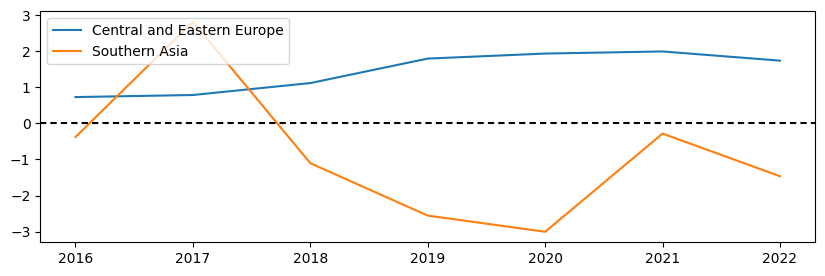

In [ ]:
plt.figure(figsize =(10,3))

# plt.plot(modified_df['Year'], modified_df['Australia and New Zealand'], label = 'Australia and New Zealand')
plt.plot(modified_df['Year'], modified_df['Central and Eastern Europe'], label = 'Central and Eastern Europe')
# plt.plot(modified_df['Year'], modified_df['Eastern Asia'], label = 'Eastern Asia')
# plt.plot(modified_df['Year'], modified_df['Latin America and Caribbean'], label = 'Latin America and Caribbean')
# plt.plot(modified_df['Year'], modified_df['Middle East and Northern Africa'], label = 'Middle East and Northern Africa')
# plt.plot(modified_df['Year'], modified_df['North America'], label = 'North America')
# plt.plot(modified_df['Year'], modified_df['Southeastern Asia'], label = 'Southeastern Asia')
plt.plot(modified_df['Year'], modified_df['Southern Asia'], label = 'Southern Asia')
# plt.plot(modified_df['Year'], modified_df['Sub-Saharan Africa'], label = 'Sub-Saharan Africa')
# plt.plot(modified_df['Year'], modified_df['Western Europe'], label = 'Western Europe')
plt.axhline(y = 0, color = 'black', dashes = (3, 2))
plt.legend(loc= 2)
plt.show()

*  Central and Eastern Europe selalu mengalami growth per tahun
*  Southern Asia mengalami growth hanya di 2016-2017 sedangkan dari 2018-2022 mengalami penurunan.

In [ ]:
avgyear3 = df0.copy()
avgyear3 = avgyear3.groupby(['Year','Regional'])['Happiness Score'].mean().reset_index()
avgyear3.tail(10)

,Year,Regional,Happiness Score
70,2022,Australia and New Zealand,7.181
71,2022,Central and Eastern Europe,5.868
72,2022,Eastern Asia,5.876
73,2022,Latin America and Caribbean,5.950
74,2022,Middle East and Northern Africa,5.170
75,2022,North America,7.001
76,2022,Southeastern Asia,5.468
77,2022,Southern Asia,4.265
78,2022,Sub-Saharan Africa,4.447
79,2022,Western Europe,6.896


In [ ]:
avgyear3_pivot = avgyear3.pivot(index=['Year'], columns='Regional',values=['Happiness Score'])
avgyear3_pivot

Happiness Score                                          \
Regional Australia and New Zealand Central and Eastern Europe Eastern Asia   
Year                                                                         
2015                         7.285                      5.333        5.626   
2016                         7.323                      5.371        5.624   
2017                         7.299                      5.410        5.647   
2018                         7.298                      5.469        5.672   
2019                         7.268                      5.561        5.689   
2020                         7.261                      5.666        5.715   
2021                         7.230                      5.770        5.811   
2022                         7.181                      5.868        5.876   

                                                                      \
Regional Latin America and Caribbean Middle East and Northern Africa   
Year                                                                   
2015                           6.223                           5.392   
2016                           6.157                           5.464   
2017                           6.071                           5.423   
2018                           6.062                           5.338   
2019                           6.066                           5.274   
2020                           6.090                           5.227   
2021                           6.029                           5.220   
2022                           5.950                           5.170   

                                                                           \
Regional North America Southeastern Asia Southern Asia Sub-Saharan Africa   
Year                                                                        
2015             7.273             5.373         4.469              4.154   
2016             7.254             5.397         4.458              4.104   
2017             7.155             5.445         4.565              4.164   
2018             7.107             5.400         4.524              4.285   
2019             7.085             5.334         4.434              4.385   
2020             7.086             5.445         4.355              4.471   
2021             7.027             5.455         4.316              4.506   
2022             7.001             5.468         4.265              4.447   

                         
Regional Western Europe  
Year                     
2015              6.690  
2016              6.686  
2017              6.704  
2018              6.764  
2019              6.842  
2020              6.899  
2021              6.915  
2022              6.896

In [ ]:
avgyear3_pivot.columns = avgyear3_pivot.columns.droplevel()
avgyear3_pivot

Regional,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2015,7.285,5.333,5.626,6.223,5.392,7.273,5.373,4.469,4.154,6.690
2016,7.323,5.371,5.624,6.157,5.464,7.254,5.397,4.458,4.104,6.686
2017,7.299,5.410,5.647,6.071,5.423,7.155,5.445,4.565,4.164,6.704
2018,7.298,5.469,5.672,6.062,5.338,7.107,5.400,4.524,4.285,6.764
2019,7.268,5.561,5.689,6.066,5.274,7.085,5.334,4.434,4.385,6.842
2020,7.261,5.666,5.715,6.090,5.227,7.086,5.445,4.355,4.471,6.899
2021,7.230,5.770,5.811,6.029,5.220,7.027,5.455,4.316,4.506,6.915
2022,7.181,5.868,5.876,5.950,5.170,7.001,5.468,4.265,4.447,6.896


In [ ]:
modified_df1=avgyear3_pivot.rename_axis(None,axis=1)
modified_df1

,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2015,7.285,5.333,5.626,6.223,5.392,7.273,5.373,4.469,4.154,6.690
2016,7.323,5.371,5.624,6.157,5.464,7.254,5.397,4.458,4.104,6.686
2017,7.299,5.410,5.647,6.071,5.423,7.155,5.445,4.565,4.164,6.704
2018,7.298,5.469,5.672,6.062,5.338,7.107,5.400,4.524,4.285,6.764
2019,7.268,5.561,5.689,6.066,5.274,7.085,5.334,4.434,4.385,6.842
2020,7.261,5.666,5.715,6.090,5.227,7.086,5.445,4.355,4.471,6.899
2021,7.230,5.770,5.811,6.029,5.220,7.027,5.455,4.316,4.506,6.915
2022,7.181,5.868,5.876,5.950,5.170,7.001,5.468,4.265,4.447,6.896


In [ ]:
modified_df1 = modified_df1.reset_index()
modified_df1.head()

,Year,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,2015,7.285,5.333,5.626,6.223,5.392,7.273,5.373,4.469,4.154,6.690
1,2016,7.323,5.371,5.624,6.157,5.464,7.254,5.397,4.458,4.104,6.686
2,2017,7.299,5.410,5.647,6.071,5.423,7.155,5.445,4.565,4.164,6.704
3,2018,7.298,5.469,5.672,6.062,5.338,7.107,5.400,4.524,4.285,6.764
4,2019,7.268,5.561,5.689,6.066,5.274,7.085,5.334,4.434,4.385,6.842


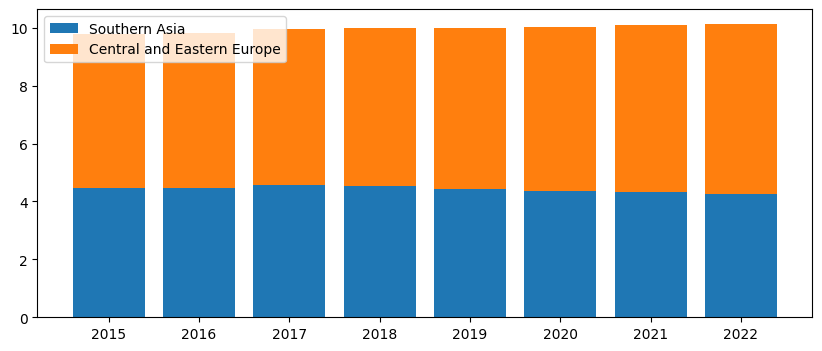

In [ ]:
plt.figure(figsize =(10, 4))

# plt.bar(modified_df1['Year'], modified_df1['Australia and New Zealand'], label = 'Australia and New Zealand')
plt.bar(modified_df1['Year'], modified_df1['Southern Asia'],label = 'Southern Asia')
plt.bar(modified_df1['Year'], modified_df1['Central and Eastern Europe'], bottom =modified_df1['Southern Asia'], label = 'Central and Eastern Europe')
# plt.bar(modified_df1['Year'], modified_df1['Eastern Asia'], label = 'Eastern Asia')
# plt.bar(modified_df1['Year'], modified_df1['Latin America and Caribbean'], label = 'Latin America and Caribbean')
# plt.bar(modified_df1['Year'], modified_df1['Middle East and Northern Africa'], label = 'Middle East and Northern Africa')
# plt.bar(modified_df1['Year'], modified_df1['North America'], label = 'North America')
# plt.bar(modified_df1['Year'], modified_df1['Southeastern Asia'], label = 'Southeastern Asia')
# plt.bar(modified_df1['Year'], modified_df1['Sub-Saharan Africa'], label = 'Sub-Saharan Africa')
# plt.bar(modified_df1['Year'], modified_df1['Western Europe'], label = 'Western Europe')
plt.legend(loc= 2)
plt.show()

In [ ]:
plotregion = df0.copy()
plotregion = plotregion.groupby(['Year','Regional'])['Happiness Score','growth_percentage'].mean().reset_index().sort_values(['Regional','Year'])
plotregion

<ipython-input-67-f20d03b911fb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plotregion = plotregion.groupby(['Year','Regional'])['Happiness Score','growth_percentage'].mean().reset_index().sort_values(['Regional','Year'])


,Year,Regional,Happiness Score,growth_percentage
0,2015,Australia and New Zealand,7.285,NaN
10,2016,Australia and New Zealand,7.323,0.528
20,2017,Australia and New Zealand,7.299,-0.335
30,2018,Australia and New Zealand,7.298,-0.015
40,2019,Australia and New Zealand,7.268,-0.414
...,...,...,...,...
39,2018,Western Europe,6.764,0.965
49,2019,Western Europe,6.842,1.216
59,2020,Western Europe,6.899,0.898
69,2021,Western Europe,6.915,0.278


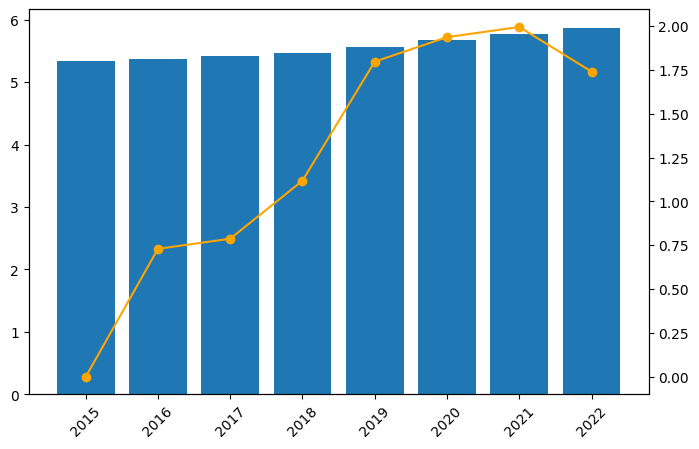

In [ ]:
ceeurope = plotregion.loc[plotregion['Regional']=='Central and Eastern Europe']
ceeurope = ceeurope.fillna(0)

fig,ax = plt.subplots(figsize=(8,5))

x = ceeurope['Year']
y_bar = ceeurope['Happiness Score']
y_line = ceeurope['growth_percentage']

ax.bar(x,y_bar) 

plt.xticks(rotation = 45) 

ax2 = ax.twinx()     
ax2.plot(x,y_line, marker = 'o', color = 'orange')

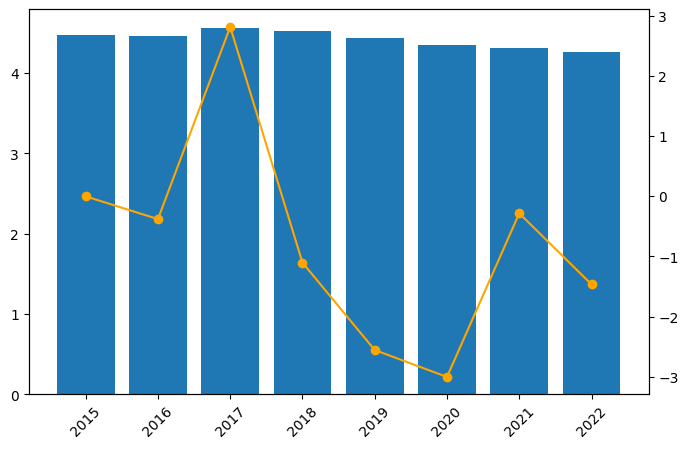

In [ ]:
sa = plotregion.loc[plotregion['Regional']=='Southern Asia']
sa = sa.fillna(0)

fig,ax = plt.subplots(figsize=(8,5))

x = sa['Year']
y_bar = sa['Happiness Score']
y_line = sa['growth_percentage']

ax.bar(x,y_bar) 

plt.xticks(rotation = 45) 

ax2 = ax.twinx()     
ax2.plot(x,y_line, marker = 'o', color = 'orange')

## CORRELATION

In [ ]:
df_corr = raw.copy()
df_corr = df_corr.drop(['Year','Rank'], axis = 1)

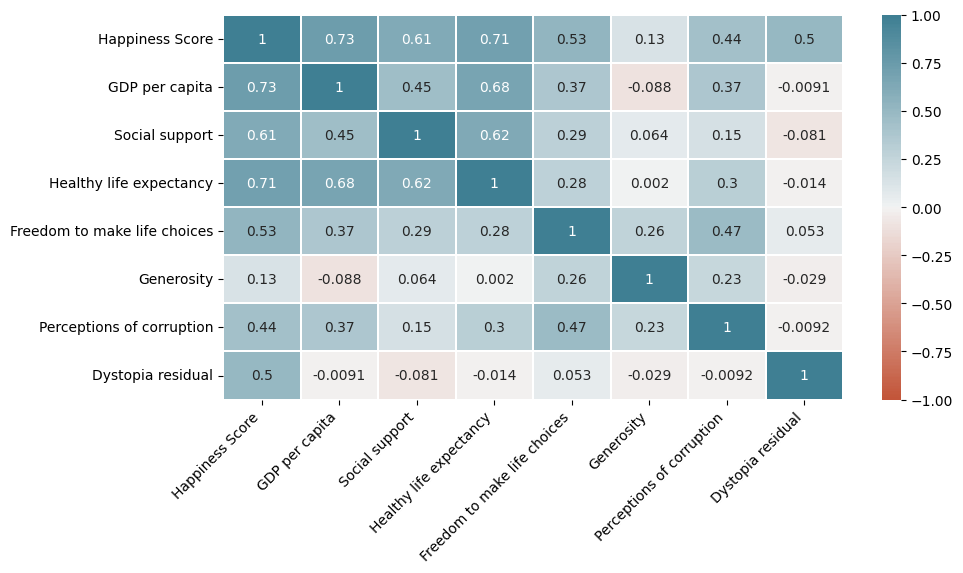

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
corr = df_corr.corr()
correlation = corr.copy()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    # square=True,
    annot=True,
    linewidths=.2
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
raw.head()

,Rank,Country,Regional,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual
0,1,Switzerland,Western Europe,2015,7.587,1.397,1.349,0.941,0.666,0.297,0.420,2.517
1,2,Iceland,Western Europe,2015,7.561,1.302,1.402,0.948,0.629,0.436,0.141,2.702
2,3,Denmark,Western Europe,2015,7.527,1.325,1.361,0.875,0.649,0.341,0.484,2.492
3,4,Norway,Western Europe,2015,7.522,1.459,1.331,0.885,0.670,0.347,0.365,2.465
4,5,Canada,North America,2015,7.427,1.326,1.323,0.906,0.633,0.458,0.330,2.452


In [ ]:
df_2018 = raw.copy()
df_2018 = df_2018.drop(['Rank'], axis = 1)

In [ ]:
df_2018.head()

,Country,Regional,Year,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia residual
0,Switzerland,Western Europe,2015,7.587,1.397,1.349,0.941,0.666,0.297,0.420,2.517
1,Iceland,Western Europe,2015,7.561,1.302,1.402,0.948,0.629,0.436,0.141,2.702
2,Denmark,Western Europe,2015,7.527,1.325,1.361,0.875,0.649,0.341,0.484,2.492
3,Norway,Western Europe,2015,7.522,1.459,1.331,0.885,0.670,0.347,0.365,2.465
4,Canada,North America,2015,7.427,1.326,1.323,0.906,0.633,0.458,0.330,2.452
